# Movie Analysis

The movie dataset that was used in this project was downloaded from Kaggle on March 01st, 2024. The original dataset can be accessed at https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies . This dataset contains 1000281 rows and 23 columns. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_data=pd.read_csv(r'movie.csv')

In [2]:
df_data.shape

(1000281, 23)

In [3]:
df_data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


Data Cleaning and Data Transformation
- Drop some unnecessary columns, like backdrop_path, homepage, overview, poster_path, tagline. Then the dataset only has 18 columns
- Check the datatype of each column to make sure it is appropriate to what I need.
- Change the release_date datatype from object to datetime, because I want to separate the day, month, and year to help me answer some questions.
- Show the statistical description of the dataset to see if there were some values that were out of the norm.
- Filtering only data that has been released and has a value greater than zero will be included in the dataset for vote_count, revenue, runtime, and budget. We need a movie that has been released to know its rating, its popularity, its revenue, its budget, and any other aspect that will help me do the analysis.
- Check if there are any rows that have missing values, so I drop that row.
- Check the duplicated data


### Drop some columns

In [4]:
df_data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [5]:
df_data2=df_data.drop(['backdrop_path','homepage','overview','poster_path','tagline'],axis=1)
df_data2.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'popularity', 'genres', 'production_companies',
       'production_countries', 'spoken_languages'],
      dtype='object')

In [6]:
df_data2.shape

(1000281, 18)

In [7]:
df_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000281 entries, 0 to 1000280
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1000281 non-null  int64  
 1   title                 1000269 non-null  object 
 2   vote_average          1000281 non-null  float64
 3   vote_count            1000281 non-null  int64  
 4   status                1000281 non-null  object 
 5   release_date          885498 non-null   object 
 6   revenue               1000281 non-null  int64  
 7   runtime               1000281 non-null  int64  
 8   adult                 1000281 non-null  bool   
 9   budget                1000281 non-null  int64  
 10  imdb_id               571828 non-null   object 
 11  original_language     1000281 non-null  object 
 12  original_title        1000269 non-null  object 
 13  popularity            1000281 non-null  float64
 14  genres                631995 non-n

### Change the data type release_date

In [8]:
df_data2['release_date']=pd.to_datetime(df_data2['release_date'])
df_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000281 entries, 0 to 1000280
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1000281 non-null  int64         
 1   title                 1000269 non-null  object        
 2   vote_average          1000281 non-null  float64       
 3   vote_count            1000281 non-null  int64         
 4   status                1000281 non-null  object        
 5   release_date          885498 non-null   datetime64[ns]
 6   revenue               1000281 non-null  int64         
 7   runtime               1000281 non-null  int64         
 8   adult                 1000281 non-null  bool          
 9   budget                1000281 non-null  int64         
 10  imdb_id               571828 non-null   object        
 11  original_language     1000281 non-null  object        
 12  original_title        1000269 non-null  ob

In [9]:
df_data2.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.000281e+06,1.000281e+06,1.000281e+06,1.000281e+06,1.000281e+06,1.000281e+06,1.000281e+06
mean,6.614178e+05,2.105135e+00,2.143904e+01,7.435880e+05,5.064372e+01,2.929857e+05,1.351276e+00
std,3.542903e+05,3.111701e+00,3.394457e+02,1.805721e+07,6.230858e+01,5.139435e+06,8.078937e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,3.699890e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e-01
50%,6.630860e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,6.000000e-01
75%,9.703520e+05,5.000000e+00,1.000000e+00,0.000000e+00,9.000000e+01,0.000000e+00,9.150000e-01
max,1.252268e+06,1.000000e+01,3.449500e+04,3.000000e+09,1.440000e+04,9.000000e+08,2.994357e+03


### Filtering only data with vote_count>0, revenue>0, runtime>0, budget >0

In [10]:
df_data3=df_data2[(df_data2.status=='Released')&(df_data2.vote_count>0)&(df_data2.revenue>0)&(df_data2.runtime>0)&(df_data2.budget>0)]
df_data3.shape

(10394, 18)

In [11]:
df_data3.isna().sum()

id                        0
title                     0
vote_average              0
vote_count                0
status                    0
release_date            114
revenue                   0
runtime                   0
adult                     0
budget                    0
imdb_id                 460
original_language         0
original_title            0
popularity                0
genres                  121
production_companies    557
production_countries    415
spoken_languages        285
dtype: int64

### Drop row with missing value in some columns (release_date, genres, production_companies, production_countries, spoken_language)

In [12]:
df_data4=df_data3.dropna()
df_data4.shape

(9411, 18)

In [13]:
df_data4.isna().sum()

id                      0
title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
imdb_id                 0
original_language       0
original_title          0
popularity              0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
dtype: int64

#### Check Duplicate Data

In [14]:
df_data4[df_data4.duplicated()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages


### 1.	Predict movie ratings based on features such as revenue, popularity, genre, and runtime.

In [15]:
#Change the average vote to exact number
def change_vote_avg(x):
    if x>=0 and x<=1:
        result = 1
    elif x>1 and x<=2:
        result = 2
    elif x>2 and x<=3:
        result = 3
    elif x>3 and x<=4:
        result = 4
    elif x>4 and x<=5:
        result = 5
    elif x>5 and x<=6:
        result = 6
    elif x>6 and x<=7:
        result = 7
    elif x>7 and x<=8:
        result = 8
    elif x>8 and x<=9:
        result = 9
    else:
        result = 10
    return result
df_data4['vote_acc'] = df_data4['vote_average'].apply(change_vote_avg)

C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\555199895.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data4['vote_acc'] = df_data4['vote_average'].apply(change_vote_avg)


In [16]:
df_data4['vote_count'].max()

34495

In [17]:
df_data4['revenue'].max()

2923706026

In [18]:
df_data4['runtime'].max()

540

In [19]:
#Split genre into three new columns
df_data4[['genre1','genre2','genre3']]=df_data4['genres'].str.split(',',n=2,expand=True)

C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\466815380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data4[['genre1','genre2','genre3']]=df_data4['genres'].str.split(',',n=2,expand=True)
C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\466815380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data4[['genre1','genre2','genre3']]=df_data4['genres'].str.split(',',n=2,expand=True)
C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\466815380.py:2: SettingWithCopyWarning: 
A value is tryin

In [20]:
#Grouping popularity
def rate_pop(x):
    if x>=0 and x<=500:
        result = '0-500'
    elif x>500 and x<=1000:
        result = '501-1000'
    elif x>1000 and x<=1500:
        result = '1001-1500'
    elif x>1500 and x<=2000:
        result = '1501-2000'
    elif x>2000 and x<=2500:
        result = '2001-2500'
    else: 
        result = '>2500'
    return result
df_data4['rate_popularity'] = df_data4['popularity'].apply(rate_pop)

#Grouping revenue
def rate_rev(y):
    if y>=0 and y<=1000000:
        result = '$0-1M'
    elif y>1000000 and y<=10000000:
        result = '$1M-10M'
    elif y>10000000 and y<=100000000:
        result = '$10M-100M'
    elif y>100000000 and y<=500000000:
        result = '$100M-500M'
    elif y>500000000 and y<=1000000000:
        result = '$500M-1B'
    else: 
        result = '>$1B'
    return result
df_data4['rate_revenue'] = df_data4['revenue'].apply(rate_rev)

#Grouping runtime
def runhour(x):
    if x>=0 and x<=60:
        result = '0-1'
    elif x>60 and x<=120:
        result = '1-2'
    elif x>120 and x<=180:
        result = '2-3'
    elif x>180 and x<=240:
        result = '3-4'
    elif x>240 and x<=300:
        result = '4-5'
    elif x>300 and x<=360:
        result = '5-6'
    elif x>360 and x<=420:
        result = '6-7'
    elif x>420 and x<=480:
        result = '7-8'
    else: 
        result = '>8'
    return result
df_data4['run_hour'] = df_data4['runtime'].apply(runhour)

C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\2451513415.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data4['rate_popularity'] = df_data4['popularity'].apply(rate_pop)
C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\2451513415.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data4['rate_revenue'] = df_data4['revenue'].apply(rate_rev)
C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\2451513415.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Because the data has a wide range, I tried to change it into some categories, and then the prediction would be easier.

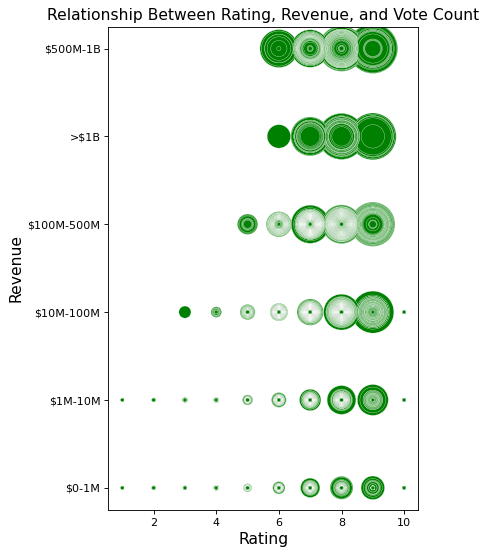

In [21]:
plt.figure(figsize=(5,8),dpi=80)
sns.scatterplot(data=df_data4, x="vote_acc", y="rate_revenue", size="vote_count", legend=False, sizes=(10,2000),color='green')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('Relationship Between Rating, Revenue, and Vote Count',fontsize=14)
#plt.rcParams['figure.figsize']=(8,8)
#plt.xticks(rotation=45)
# show the graph
plt.show()

Movies with high rating mostly got high revenue too, and more people voted for the movie, 
-	High revenue, high rating

Text(0.5, 1.0, 'Predict Movie Rating Based On Popularity')

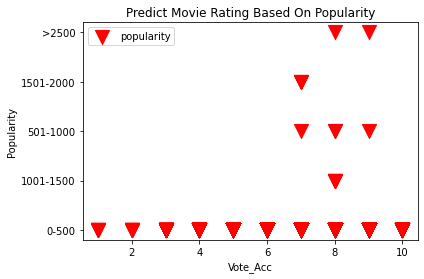

In [22]:
plt.scatter(df_data4['vote_acc'],df_data4['rate_popularity'],s=200,color='red',marker='v')
plt.legend(['popularity'])
plt.xlabel('Vote_Acc')
plt.ylabel('Popularity')
plt.title('Predict Movie Rating Based On Popularity')

Movies with high ratings have high popularity

Text(0.5, 1.0, 'Predict Movie Rating Based On Runtime')

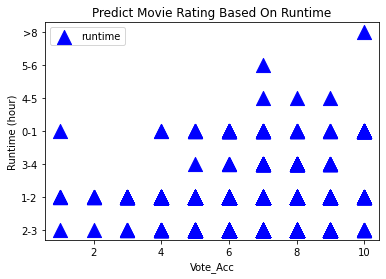

In [23]:
plt.scatter(df_data4['vote_acc'],df_data4['run_hour'],s=200,color='blue',marker='^')
plt.legend(['runtime'])
plt.xlabel('Vote_Acc')
plt.ylabel('Runtime (hour)')
plt.title('Predict Movie Rating Based On Runtime')

Movies with long runtime (more than 4 hours) have high ratings, and movies with 0-3 hours have variety ratings.

Text(0.5, 1.0, 'Predict Movie Rating Based On Genre')

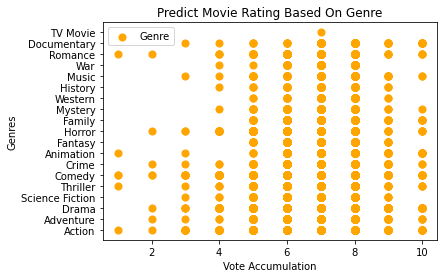

In [24]:
plt.scatter(df_data4['vote_acc'],df_data4['genre1'],s=200,color='orange',marker='.')
plt.legend(['Genre'])
plt.xlabel('Vote Accumulation')
plt.ylabel('Genres')
plt.title('Predict Movie Rating Based On Genre')

Genres in movie do not affect the movie rating

### 2.	Identify trends in movie release dates and analyze their impact on revenue.

To see the trends in movie release date and revenue, the user needs to input what the year that they want to see. For example, if we input 2023, then in 2023 we can see that movies had high revenue when they were released in mid- year (May, June, and July). 

In [25]:
#Split the year, month, and day from release_date into three different columns
df_data4['rel_year'] = pd.DatetimeIndex(df_data4['release_date']).year
df_data4['rel_month'] = pd.DatetimeIndex(df_data4['release_date']).month
df_data4['rel_date'] = pd.DatetimeIndex(df_data4['release_date']).day
df_data4

C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\2049505386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data4['rel_year'] = pd.DatetimeIndex(df_data4['release_date']).year
C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\2049505386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data4['rel_month'] = pd.DatetimeIndex(df_data4['release_date']).month
C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\2049505386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,vote_acc,genre1,genre2,genre3,rate_popularity,rate_revenue,run_hour,rel_year,rel_month,rel_date
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,...,9,Action,Science Fiction,Adventure,0-500,$500M-1B,2-3,2010,7,15
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,...,9,Adventure,Drama,Science Fiction,0-500,$500M-1B,2-3,2014,11,5
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,...,9,Drama,Action,"Crime, Thriller",0-500,>$1B,2-3,2008,7,16
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,...,8,Action,Adventure,"Fantasy, Science Fiction",0-500,>$1B,2-3,2009,12,15
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,...,8,Science Fiction,Action,Adventure,0-500,>$1B,2-3,2012,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344126,209937,Big Jack,6.000,1,Released,1949-04-12,915000,85,False,869000,...,6,Adventure,Western,None,0-500,$0-1M,1-2,1949,4,12
344602,224219,Action 3D,4.000,1,Released,2013-06-21,12000000,150,False,6100000,...,4,Comedy,None,None,0-500,$10M-100M,2-3,2013,6,21
345772,228058,Toni Goldwascher,5.000,1,Released,2007-09-06,233984,89,False,722727,...,5,Family,Adventure,None,0-500,$0-1M,1-2,2007,9,6
345803,12274,Kuselan,5.000,1,Released,2008-08-01,1000000,160,False,9900000,...,5,Drama,None,None,0-500,$0-1M,2-3,2008,8,1


Enter the year:
2023


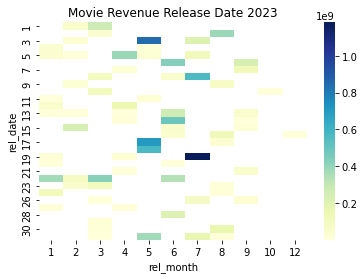

In [26]:
# Filter data year
print('Enter the year:')
x = input()
filtered_df = df_data4.loc[(df_data4['rel_year'] == int(x))]
# Display
#filtered_df
time_matrix = filtered_df.pivot_table(index="rel_date", columns="rel_month", values="revenue")
sns.heatmap(time_matrix, cmap="YlGnBu", annot=False, fmt="0.0f")
plt.title('Movie Revenue Release Date '+ x)
plt.show()

But in 2022, we can see that movie with high revenue when it is  released in May and December

Enter the year:
2022


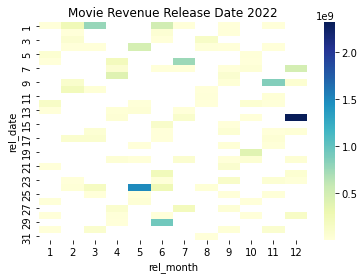

In [27]:
# Filter data year
print('Enter the year:')
x = input()
filtered_df = df_data4.loc[(df_data4['rel_year'] == int(x))]
# Display
#filtered_df
time_matrix = filtered_df.pivot_table(index="rel_date", columns="rel_month", values="revenue")
sns.heatmap(time_matrix, cmap="YlGnBu", annot=False, fmt="0.0f")
plt.title('Movie Revenue Release Date '+ x)
plt.show()

In 2021, movies with high revenue were released in May, September, and December.

Enter the year:
2021


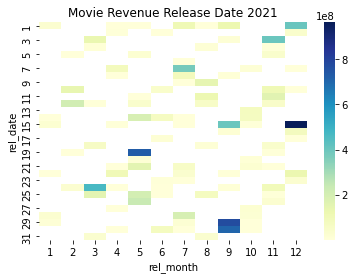

In [28]:
# Filter data year
print('Enter the year:')
x = input()
filtered_df = df_data4.loc[(df_data4['rel_year'] == int(x))]
# Display
#filtered_df
time_matrix = filtered_df.pivot_table(index="rel_date", columns="rel_month", values="revenue")
sns.heatmap(time_matrix, cmap="YlGnBu", annot=False, fmt="0.0f")
plt.title('Movie Revenue Release Date '+ x)
plt.show()

From the samples above, we can conclude that movies released at the midpoint and end of the year have high revenue.

### 3.	Analyze the relationship between budget, revenue, and popularity to determine factors that contribute to a movie's success.

Text(0.5, 1.0, 'Relationship Between Budget, Revenue, and Popularity')

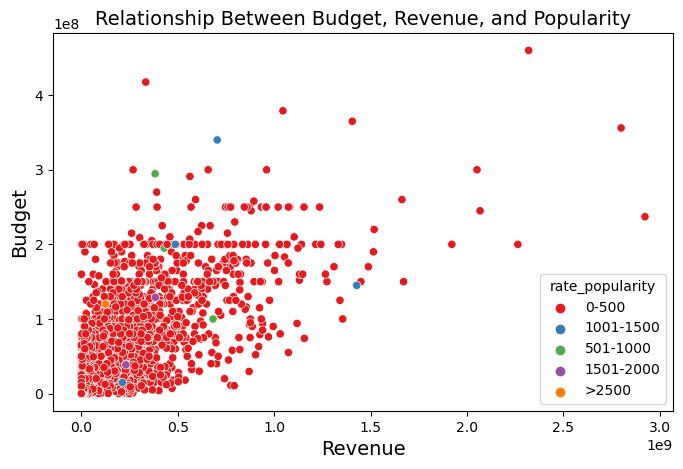

In [29]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(data=df_data4, x="revenue", y="budget", hue="rate_popularity", palette='Set1')
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Budget', fontsize=14)
plt.title('Relationship Between Budget, Revenue, and Popularity',fontsize=14)

Movies with low popularity spread most in budget less than 200 million and revenue less than 1 billion and movies with high budget and high revenue have popularity 0-500. Meanwhile, a movie with high popularity >2500 only needs a budget around 100-150 million and it gets revenue around 0.1-0.2 billion. Another rate of high popularity tends to be in various budget and various revenues.

### 4.	Build a recommendation system that suggests similar movies based on genres, production companies, and language. 

The recommendations system that I made asked user to input the title of the movie that they wanted to know, and then after the user read the information, they were asked to input the genre and production company that they wanted to know, because most movies have more than one production company. The system then showed the movie that matched the user’s order.

In [30]:
df_data4[['comp1','comp2','comp3','comp4','comp5']]=df_data4['production_companies'].str.split(',',n=4,expand=True)

C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\988762729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data4[['comp1','comp2','comp3','comp4','comp5']]=df_data4['production_companies'].str.split(',',n=4,expand=True)
C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\988762729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data4[['comp1','comp2','comp3','comp4','comp5']]=df_data4['production_companies'].str.split(',',n=4,expand=True)
C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\988

In [31]:
# Filter data year
pd.set_option('display.max_colwidth',-1)
print('Enter the Title:')
title_input = input()
mov1_df = df_data4.loc[(df_data4['title'] == str(title_input)),['title','revenue','genres','production_companies','original_language']]
# Display
mov1_df

C:\Users\Chyndi\AppData\Local\Temp\ipykernel_12172\3220329044.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


Enter the Title:
Frozen


,title,revenue,genres,production_companies,original_language
101,Frozen,1274219009,"Animation, Family, Adventure, Fantasy","Walt Disney Pictures, Walt Disney Animation Studios",en


In [32]:
# Filter data year
print('Enter the genre that you want for your recommendation:')
in_genre = input()
print('Enter the production company that you want for your recommendation:')
in_comp = input()
rec1 = df_data4.loc[((df_data4['genre1'] == str(in_genre))&(df_data4['comp1']==str(in_comp))),['title','genres','production_companies','original_language']]
# Display
rec1

Enter the genre that you want for your recommendation:
Animation
Enter the production company that you want for your recommendation:
Walt Disney Pictures


,title,genres,production_companies,original_language
101,Frozen,"Animation, Family, Adventure, Fantasy","Walt Disney Pictures, Walt Disney Animation Studios",en
168,Brave,"Animation, Adventure, Comedy, Family, Action, Fantasy","Walt Disney Pictures, Pixar",en
244,Aladdin,"Animation, Family, Adventure, Fantasy, Romance","Walt Disney Pictures, Walt Disney Feature Animation",en
307,Soul,"Animation, Family, Comedy, Fantasy, Drama","Walt Disney Pictures, Pixar",en
345,Mulan,"Animation, Family, Adventure","Walt Disney Pictures, Walt Disney Feature Animation",en
470,The Little Mermaid,"Animation, Family, Fantasy","Walt Disney Pictures, Silver Screen Partners IV, Walt Disney Feature Animation",en
516,Hercules,"Animation, Family, Fantasy, Adventure, Comedy, Romance","Walt Disney Pictures, Walt Disney Feature Animation",en
596,Raya and the Last Dragon,"Animation, Family, Fantasy, Action, Adventure","Walt Disney Pictures, Walt Disney Animation Studios",en
701,Lilo & Stitch,"Animation, Family","Walt Disney Pictures, Walt Disney Feature Animation",en
938,Turning Red,"Animation, Family, Comedy, Fantasy","Walt Disney Pictures, Pixar",en


### 5.	Perform sentiment analysis on movie reviews to understand audience reactions.

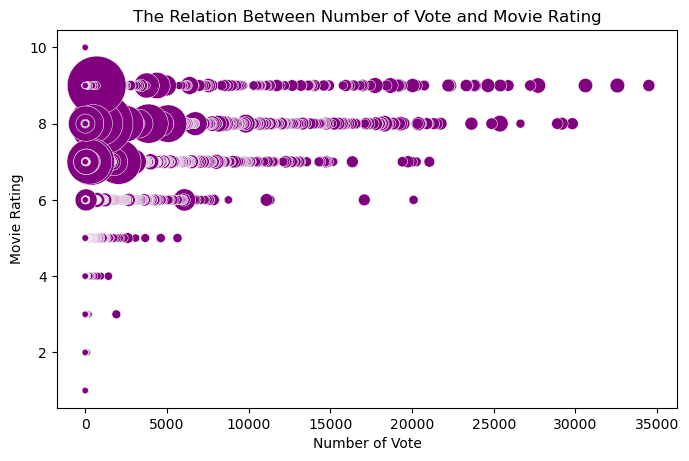

In [33]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(data=df_data4, x="vote_count", y="vote_acc", size="popularity", legend=False, sizes=(20,2000),color='purple')
# show the graph
plt.title('The Relation Between Number of Vote and Movie Rating')
plt.xlabel('Number of Vote')
plt.ylabel('Movie Rating')
plt.show()

In the graph, the bigger the circle, more popular the movie is. The number of votes doesn’t affect movie popularity, but most of the movies with high popularity have a high rating too. If more people vote, the movie will get higher ratings, because when there are only a few voters, when they give low ratings it cannot help boost the movie rating.

### 6.	Explore the impact of movie genres on popularity and revenue.

In [34]:
df_q6=df_data4.groupby(["rate_revenue","rate_popularity","genre1"],as_index=False)['title'].count()

In [35]:
df_q6

,rate_revenue,rate_popularity,genre1,title
0,$0-1M,0-500,Action,184
1,$0-1M,0-500,Adventure,43
2,$0-1M,0-500,Animation,39
3,$0-1M,0-500,Comedy,289
4,$0-1M,0-500,Crime,78
...,...,...,...,...
105,>$1B,0-500,Drama,2
106,>$1B,0-500,Family,5
107,>$1B,0-500,Fantasy,1
108,>$1B,0-500,Science Fiction,3


Enter rate_revenue: $0-1M or $1M-10M or $10M-100M or $100M-500M or $500M-1B or >$1B
$100M-500M
Enter rate_popularity: 0-500 | 501-1000 | 1001-1500 | 1501-2000 | 2001-2500 | >2500
0-500


Text(0.5, 1.0, 'Amount of Movie in Every Genre that have Revenue $100M-500M and Rate Popularity 0-500')

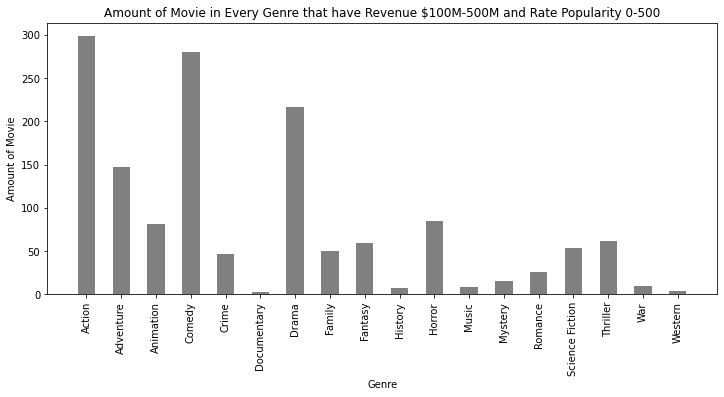

In [36]:
print('Enter rate_revenue: $0-1M or $1M-10M or $10M-100M or $100M-500M or $500M-1B or >$1B')
abc = input()
print('Enter rate_popularity: 0-500 | 501-1000 | 1001-1500 | 1501-2000 | 2001-2500 | >2500')
abb = input()
#df_q6.info()
df_q61 = df_q6.loc[(df_q6['rate_revenue'] == str(abc))]
df_q62 = df_q61.loc[(df_q61['rate_popularity'] == str(abb))]
#df_q61
#df_q62
# Display
plt.figure(figsize=(12, 5))
plt.bar(df_q62['genre1'], df_q62['title'], width=0.5, color='gray')
plt.xlabel('Genre')
plt.ylabel('Amount of Movie')
plt.xticks(rotation = 90)
plt.title('Amount of Movie in Every Genre that have Revenue '+ abc +' and Rate Popularity '+abb)


When we input different popularity from 0-500 to >2500, there are some movies that’s not too popular but have such high revenue, such as action, comedy, drama, adventure, etc. 

### 7.	Investigate the correlation between runtime and audience engagement.

In [37]:
df_q7=df_data4.groupby(["vote_acc","run_hour"],as_index=False)['title'].count()
df_q7

,vote_acc,run_hour,title
0,1,0-1,1
1,1,1-2,4
2,1,2-3,1
3,2,1-2,7
4,2,2-3,1
5,3,1-2,26
6,3,2-3,6
7,4,0-1,2
8,4,1-2,88
9,4,2-3,16


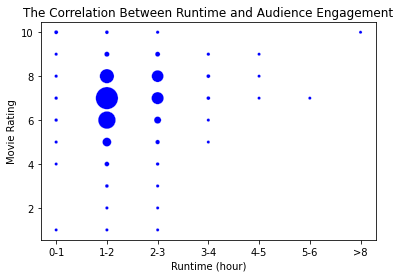

In [38]:
sns.scatterplot(data=df_q7, x="run_hour", y="vote_acc", size="title", legend=False, sizes=(10,500),color='blue')
plt.title('The Correlation Between Runtime and Audience Engagement')
plt.xlabel('Runtime (hour)')
plt.ylabel('Movie Rating')
# show the graph
plt.show()

In that graph, the size of the circle means the number of movies.
The graph above shows that many movies with a rating 6-8 have runtime of 1-2 hours and movies that got great audience engagement were those with a runtime 0-3 hours, and more than 8 hours. But movies with 0-3 hours also have a different rating distribution, but movies with a runtime of more than 3 hours give such a great rating.
So, we can conclude that runtime has no correlation with the movie rating.

### 8.	Identify successful production companies and analyze their strategies.

In [39]:
df_q8=df_data4.groupby(["rate_revenue","comp1"],as_index=False)['title'].count()
df_q8

,rate_revenue,comp1,title
0,$0-1M,10th Hole Productions,1
1,$0-1M,2 Creative Minds,1
2,$0-1M,20th Century Fox,5
3,$0-1M,26 Films,1
4,$0-1M,2DUX²,1
...,...,...,...
5059,>$1B,Universal Pictures,1
5060,>$1B,Walt Disney Animation Studios,1
5061,>$1B,Walt Disney Pictures,10
5062,>$1B,Warner Bros. Pictures,4


In this problem, the user needs to input the revenue rate that they want to explore then user need to input the production company that they want to know.

In [40]:
print('Enter Rate Revenue: $0-1M or $1M-10M or $10M-100M or $100M-500M or $500M-1B or >$1B')
in_rev = input()
df_q81 = df_q8.loc[(df_q8['rate_revenue'] == str(in_rev))]
df_q81.sort_values(by=['title'],ascending=False)

Enter Rate Revenue: $0-1M or $1M-10M or $10M-100M or $100M-500M or $500M-1B or >$1B
$500M-1B


,rate_revenue,comp1,title
5017,$500M-1B,Marvel Studios,15
5042,$500M-1B,Warner Bros. Pictures,13
5041,$500M-1B,Walt Disney Pictures,13
4994,$500M-1B,DreamWorks Animation,11
5023,$500M-1B,Paramount,10
...,...,...,...
5007,$500M-1B,Imagine Entertainment,1
5008,$500M-1B,Jerry Bruckheimer Films,1
5009,$500M-1B,Laura Ziskin Productions,1
5011,$500M-1B,Lightstorm Entertainment,1


Then for example we want to know about Walt Disney Pictures.

##### Then you must to choose the production company that you want to know

In [41]:
print('Enter The Production Company: ')
in_comp = input()
df_q82 = df_data4.loc[((df_data4['comp1'] == str(in_comp))&(df_data4['rate_revenue']==str(in_rev)))]
df_q82

Enter The Production Company: 
Walt Disney Pictures


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,rate_revenue,run_hour,rel_year,rel_month,rel_date,comp1,comp2,comp3,comp4,comp5
47,22,Pirates of the Caribbean: The Curse of the Black Pearl,7.794,19233,Released,2003-07-09,655011224,143,False,140000000,...,$500M-1B,2-3,2003,7,9,Walt Disney Pictures,Jerry Bruckheimer Films,None,None,None
76,8587,The Lion King,8.256,16991,Released,1994-06-24,763455561,89,False,45000000,...,$500M-1B,1-2,1994,6,24,Walt Disney Pictures,Walt Disney Feature Animation,None,None,None
110,177572,Big Hero 6,7.738,14732,Released,2014-10-24,657827828,102,False,165000000,...,$500M-1B,1-2,2014,10,24,Walt Disney Pictures,Walt Disney Animation Studios,None,None,None
168,62177,Brave,7.012,12591,Released,2012-06-21,538983207,93,False,185000000,...,$500M-1B,1-2,2012,6,21,Walt Disney Pictures,Pixar,None,None,None
170,102651,Maleficent,7.090,12477,Released,2014-05-28,758539785,97,False,180000000,...,$500M-1B,1-2,2014,5,28,Walt Disney Pictures,Roth Films,None,None,None
204,277834,Moana,7.600,11502,Released,2016-10-13,690860472,107,False,150000000,...,$500M-1B,1-2,2016,10,13,Walt Disney Pictures,Walt Disney Animation Studios,Hurwitz Creative,None,None
219,166426,Pirates of the Caribbean: Dead Men Tell No Tales,6.648,11176,Released,2017-05-23,795922298,128,False,230000000,...,$500M-1B,2-3,2017,5,23,Walt Disney Pictures,Jerry Bruckheimer Films,Infinitum Nihil,None,None
244,812,Aladdin,7.645,10547,Released,1992-11-25,504050219,95,False,28000000,...,$500M-1B,1-2,1992,11,25,Walt Disney Pictures,Walt Disney Feature Animation,None,None,None
283,411,"The Chronicles of Narnia: The Lion, the Witch and the Wardrobe",7.126,9808,Released,2005-12-07,745013115,143,False,180000000,...,$500M-1B,2-3,2005,12,7,Walt Disney Pictures,Walden Media,C.S. Lewis Company,None,None
433,278927,The Jungle Book,6.860,7668,Released,2016-04-07,966550600,106,False,175000000,...,$500M-1B,1-2,2016,4,7,Walt Disney Pictures,Fairview Entertainment,Moving Picture Company,None,None


Then we can see all information about the movies that have been released by that company, and then we can explore it more to know their strategies to produce such successful movies.